# Exploring eBay Car Sales Data

## Objective 

The aim of this project is to clean the data and analyze the included used car listings.
The dataset was originally scraped and uploaded to Kaggle by user orgesleka.
The original dataset isn't available on Kaggle anymore, but you can find it <a href=here.


## Loading the dataset

In [2]:
import pandas as pd
import numpy as np
autos = pd.read_csv("autos.csv",encoding="Latin-1")

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


1. Missing values in vehicleType,gearbox,fuelType,notRepairedDamage
2. Numeric columns : price,powerPS,kilometer,monthOfRegistration,yearOfRegistration,nrOfPictures,postalCode
3. Date columns : dateCreated,lastSeen,dateCrawled
4. The dataset contains 20 columns, most of which are strings.Some columns have null values, but none have more than ~20% null values.
5. The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.

In [5]:
# Existing columns

autos.columns.to_list()

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'odometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']

In [6]:
# Rename columns

autos.rename({'yearOfRegistration':'registration_year',
                 'monthOfRegistration':'registration_month',
                 'notRepairedDamage':'unrepaired_damage',
                 'dateCreated':'ad_created'},axis=1,inplace=True)

In [7]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [8]:
autos.describe()

,registration_year,powerPS,registration_month,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


* Registration year min and max values look to be out of limits
* Power PS max values seem to be outlier
* nrOfPictures seem to have value to be 0 so can be dropped

In [9]:
autos.describe()

,registration_year,powerPS,registration_month,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [10]:
autos.describe(include='all') # includes categorical data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-04 16:40:33,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [11]:
# column seller can be dropped since it has same value in every row
autos.seller.value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [12]:
# column offer_type can be dropped since it has same value in every row
autos.offerType.value_counts()

Angebot    49999
Gesuch         1
Name: offerType, dtype: int64

In [13]:
# Dropping offType and seller columns since we have only 1/50000 change in data
autos.drop('offerType',axis=1,inplace=True)
autos.drop('seller',axis=1,inplace=True)

In [14]:
autos.head()

,dateCrawled,name,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [15]:
# rename odometer column as odometer_km

autos.rename({'odometer':'odometer_km'},axis=1,inplace=True)

In [16]:
autos.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'registration_year', 'gearbox', 'powerPS', 'model', 'odometer_km',
       'registration_month', 'fuelType', 'brand', 'unrepaired_damage',
       'ad_created', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')

In [17]:
autos['odometer_km'] = autos['odometer_km'].str.replace('km','').str.replace(',','').astype(int)

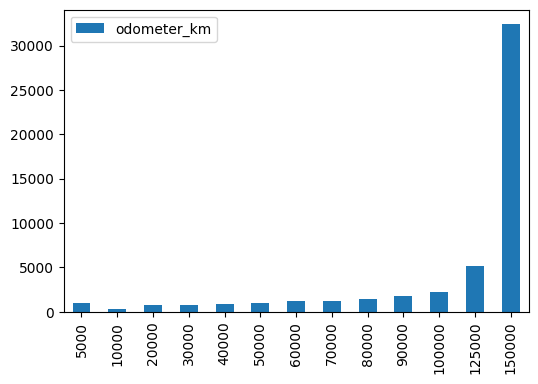

In [18]:
# Investigating odometer_km , price columns
%matplotlib inline
import matplotlib.pyplot as plt
odometer_km_count = autos.odometer_km.value_counts().sort_index()
odometer_km_count.plot.bar()
plt.legend()
plt.show()

In [19]:
# Investigating  odometer_km columns
df = pd.DataFrame()
df['odometer_km_hist'] = odometer_km_count
df['pdf'] = df['odometer_km_hist']/sum(df['odometer_km_hist'])
df['cdf'] = df['pdf'].cumsum()
df['val_count'] = df.index
df = df.reset_index(drop=True)
df

,odometer_km_hist,pdf,cdf,val_count
0,967,0.01934,0.01934,5000
1,264,0.00528,0.02462,10000
2,784,0.01568,0.04030,20000
3,789,0.01578,0.05608,30000
4,819,0.01638,0.07246,40000
5,1027,0.02054,0.09300,50000
6,1164,0.02328,0.11628,60000
7,1230,0.02460,0.14088,70000
8,1436,0.02872,0.16960,80000
9,1757,0.03514,0.20474,90000


* 65% used car listings has odometer km >150000
* 20% used car listings odometer km <=90000

In [20]:
autos.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'registration_year', 'gearbox', 'powerPS', 'model', 'odometer_km',
       'registration_month', 'fuelType', 'brand', 'unrepaired_damage',
       'ad_created', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')

In [21]:
autos.rename({'dateCrawled':'date_crawled','lastSeen':'last_seen'},axis=1,inplace=True)

# Lets move on to the date values 

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

In [22]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [23]:
autos['date_crawled']

0        2016-03-26 17:47:46
1        2016-04-04 13:38:56
2        2016-03-26 18:57:24
3        2016-03-12 16:58:10
4        2016-04-01 14:38:50
                ...         
49995    2016-03-27 14:38:19
49996    2016-03-28 10:50:25
49997    2016-04-02 14:44:48
49998    2016-03-08 19:25:42
49999    2016-03-14 00:42:12
Name: date_crawled, Length: 50000, dtype: object

In [24]:
# Looking at the distributions for all 3

autos['date_crawled'] = autos['date_crawled'].str[:10]

autos['ad_created'] = autos['ad_created'].str[:10]

autos['last_seen'] = autos['last_seen'].str[:10]

Index(['2016-03-05', '2016-03-06', '2016-03-07', '2016-03-08', '2016-03-09',
       '2016-03-10', '2016-03-11', '2016-03-12', '2016-03-13', '2016-03-14',
       '2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18', '2016-03-19',
       '2016-03-20', '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
       '2016-03-25', '2016-03-26', '2016-03-27', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-02', '2016-04-03',
       '2016-04-04', '2016-04-05', '2016-04-06', '2016-04-07'],
      dtype='object')


array([0.02538, 0.01394, 0.03596, 0.0333 , 0.03322, 0.03212, 0.03248,
       0.03678, 0.01556, 0.03662, 0.03398, 0.0295 , 0.03152, 0.01306,
       0.0349 , 0.03782, 0.03752, 0.03294, 0.03238, 0.0291 , 0.03174,
       0.03248, 0.03104, 0.03484, 0.03418, 0.03362, 0.03192, 0.0338 ,
       0.0354 , 0.03868, 0.03652, 0.0131 , 0.00318, 0.00142])

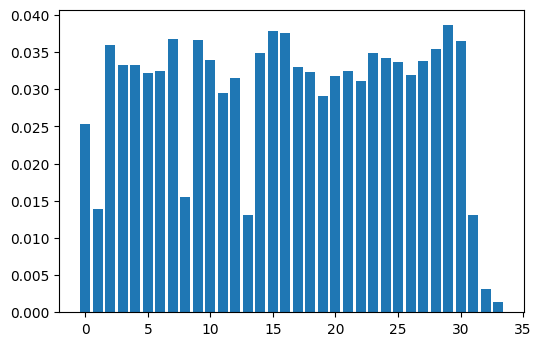

In [25]:


data = autos['date_crawled'].value_counts(normalize = True, dropna = False).sort_index()
# plt.plot(x=autos['date_crawled'].value_counts(normalize = True, dropna = False),y=data)
plt.bar(range(len(data)),data.values)
print(data.index)
data.values

array([2.000e-05, 2.000e-05, 2.000e-05, 2.000e-05, 2.000e-05, 2.000e-05,
       2.000e-05, 2.000e-05, 4.000e-05, 2.000e-05, 2.000e-05, 2.000e-05,
       2.000e-05, 6.000e-05, 2.000e-05, 2.000e-05, 4.000e-05, 4.000e-05,
       2.000e-05, 2.000e-05, 4.000e-05, 2.000e-05, 6.000e-05, 4.000e-05,
       2.000e-05, 2.000e-05, 4.000e-05, 6.000e-05, 4.000e-05, 6.000e-05,
       2.000e-05, 8.000e-05, 4.000e-05, 6.000e-05, 4.000e-05, 1.200e-04,
       2.000e-04, 1.600e-04, 1.000e-04, 1.000e-04, 8.600e-04, 1.440e-03,
       2.304e-02, 1.512e-02, 3.474e-02, 3.334e-02, 3.324e-02, 3.186e-02,
       3.278e-02, 3.662e-02, 1.692e-02, 3.522e-02, 3.374e-02, 3.000e-02,
       3.120e-02, 1.372e-02, 3.384e-02, 3.786e-02, 3.772e-02, 3.280e-02,
       3.218e-02, 2.908e-02, 3.188e-02, 3.256e-02, 3.090e-02, 3.496e-02,
       3.414e-02, 3.344e-02, 3.192e-02, 3.380e-02, 3.508e-02, 3.892e-02,
       3.688e-02, 1.184e-02, 3.260e-03, 1.280e-03])

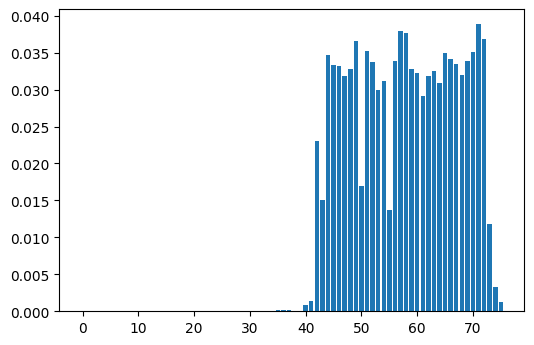

In [26]:
data = autos['ad_created'].value_counts(normalize = True, dropna = False).sort_index()
# plt.plot(x=autos['date_crawled'].value_counts(normalize = True, dropna = False),y=data)
plt.bar(range(len(data)),data.values)
data.index
data.values

array([0.00108, 0.00442, 0.00536, 0.0076 , 0.00986, 0.01076, 0.01252,
       0.02382, 0.00898, 0.0128 , 0.01588, 0.01644, 0.02792, 0.00742,
       0.01574, 0.0207 , 0.02074, 0.02158, 0.01858, 0.01956, 0.0192 ,
       0.01696, 0.01602, 0.02086, 0.02234, 0.02484, 0.02384, 0.0231 ,
       0.0249 , 0.02536, 0.02462, 0.12428, 0.221  , 0.13092])

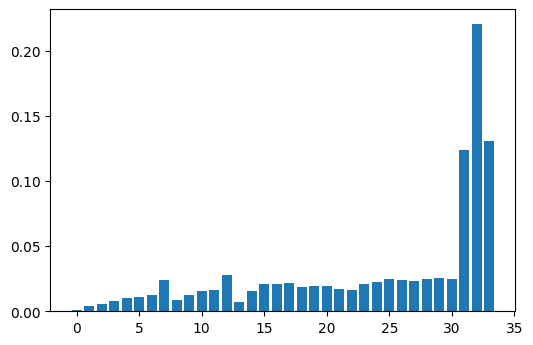

In [27]:
data = autos['last_seen'].value_counts(normalize = True, dropna = False).sort_index()
# plt.plot(x=autos['date_crawled'].value_counts(normalize = True, dropna = False),y=data)
plt.bar(range(len(data)),data.values)
data.index
data.values

In [28]:
autos['date_crawled'].value_counts(normalize = True, dropna = False).sort_index().describe()

count    34.000000
mean      0.029412
std       0.009765
min       0.001420
25%       0.029885
50%       0.032710
75%       0.034885
max       0.038680
Name: date_crawled, dtype: float64

In [29]:
autos['ad_created'].value_counts(normalize = True, dropna = False).sort_index().describe()

count    76.000000
mean      0.013158
std       0.015958
min       0.000020
25%       0.000020
50%       0.000140
75%       0.032275
max       0.038920
Name: ad_created, dtype: float64

In [30]:
autos['last_seen'].value_counts(normalize = True, dropna = False).sort_index().describe()

count    34.000000
mean      0.029412
std       0.043483
min       0.001080
25%       0.012590
50%       0.019380
75%       0.023835
max       0.221000
Name: last_seen, dtype: float64

* We have a uniform distribution for dates crawled
* Last Seen date count spiked towards the recent values
* Most ad created dates fall within 1-2 months of the listing date

In [31]:
date_crawled = autos['date_crawled'].value_counts(normalize = True, dropna = False).sort_index()

In [32]:
ad_created = autos['ad_created'].value_counts(normalize = True, dropna = False).sort_index()

In [33]:
last_seen = autos['last_seen'].value_counts(normalize = True, dropna = False).sort_index()

In [34]:
a1 = pd.DataFrame({
    'date' : date_crawled.index,
    'val' : date_crawled.values,
    'type' : 'date_crawled'
})
a2 = pd.DataFrame({
    'date' : ad_created.index,
    'val' : ad_created.values,
    'type' : 'ad_created'
})
a3 = pd.DataFrame({
    'date' : last_seen.index,
    'val' : last_seen.values,
    'type' : 'last_seen'
})

In [35]:
combined = pd.concat([a1,a2,a3],axis=0).sort_values(by='date').reset_index(drop=True)

In [36]:
date_map = pd.DataFrame({
    'date':combined.date.unique(),
    'slot':range(len(combined.date.unique()))
})

In [37]:
date_map_={}
for date,slot in zip(date_map.date,date_map.slot):
    date_map_[date] = slot

In [38]:
combined['slot'] = [date_map_[date] for date in combined.date]

In [39]:
combined

,date,val,type,slot
0,2015-06-11,0.00002,ad_created,0
1,2015-08-10,0.00002,ad_created,1
2,2015-09-09,0.00002,ad_created,2
3,2015-11-10,0.00002,ad_created,3
4,2015-12-05,0.00002,ad_created,4
...,...,...,...,...
139,2016-04-06,0.00326,ad_created,74
140,2016-04-06,0.22100,last_seen,74
141,2016-04-07,0.00142,date_crawled,75
142,2016-04-07,0.00128,ad_created,75


In [40]:
x1 = combined[combined['type']=='ad_created'].slot.values
y1 = combined[combined['type']=='ad_created'].val.values

x2 = combined[combined['type']=='date_crawled'].slot.values
y2 = combined[combined['type']=='date_crawled'].val.values

x3 = combined[combined['type']=='last_seen'].slot.values
y3 = combined[combined['type']=='last_seen'].val.values


In [41]:
y2

array([0.02538, 0.01394, 0.03596, 0.0333 , 0.03322, 0.03212, 0.03248,
       0.03678, 0.01556, 0.03662, 0.03398, 0.0295 , 0.03152, 0.01306,
       0.0349 , 0.03782, 0.03752, 0.03294, 0.03238, 0.0291 , 0.03174,
       0.03248, 0.03104, 0.03484, 0.03418, 0.03362, 0.03192, 0.0338 ,
       0.0354 , 0.03868, 0.03652, 0.0131 , 0.00318, 0.00142])

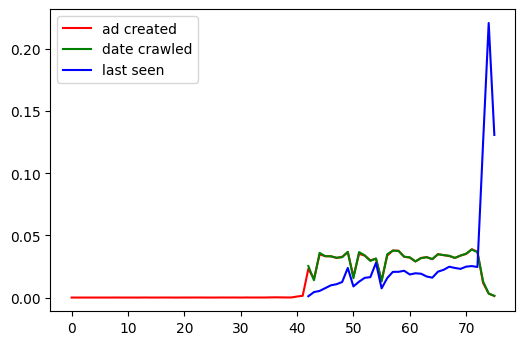

In [42]:

import matplotlib.pyplot as plt
# Plotting both the curves simultaneously
plt.plot(x1, y1, color='r', label='ad created')
plt.plot(x2, y2, color='g', label='date crawled')
plt.plot(x3, y3, color='b', label='last seen')
plt.legend()
plt.show()

## Exploring registration year

In [43]:
# Next lets look at the 

autos["registration_year"].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

* Minimum value of 1000 and maximum value of 9999 are extreme outliers
* This data also reveals the age of the car

In [44]:
# Since cars were manufactured from 1900 and dataset indicates maximum of 2016

(~autos["registration_year"].between(1900,2016)).sum()/ autos.shape[0]

0.03944

In [45]:
# Above % is less than 4 and hence could be dropped

autos = autos[~(~autos["registration_year"].between(1900,2016))]

In [46]:

autos["registration_year"].value_counts(normalize=True).head(10).sort_index().cumsum()

1998    0.051074
1999    0.113538
2000    0.183372
2001    0.239652
2002    0.292392
2003    0.349171
2004    0.406159
2005    0.468935
2006    0.525319
2007    0.573291
Name: registration_year, dtype: float64

* Most of the data is from last 20 years

# Explore Price by brand

In [47]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(float)

In [48]:
# First lets see how many brands are present 

autos['brand'].value_counts(normalize=True).sort_values().cumsum()

lada              0.000604
lancia            0.001687
rover             0.003040
daewoo            0.004539
trabant           0.006101
jaguar            0.007683
saab              0.009286
land_rover        0.011327
subaru            0.013513
jeep              0.015762
dacia             0.018323
daihatsu          0.020884
chrysler          0.024548
chevrolet         0.030253
suzuki            0.036166
porsche           0.042267
alfa_romeo        0.048888
kia               0.055988
honda             0.063838
mitsubishi        0.071979
mini              0.080620
volvo             0.089864
hyundai           0.099713
sonstige_autos    0.110665
toyota            0.123137
smart             0.137045
citroen           0.150974
nissan            0.166070
mazda             0.181207
skoda             0.197239
seat              0.215416
fiat              0.241276
peugeot           0.270800
renault           0.318148
ford              0.387940
audi              0.474327
mercedes_benz     0.569689
o

In [49]:
# Selecting carmakers that contribute to 65% data
s = autos['brand'].value_counts(normalize=True).sort_values().cumsum()>(1-0.65)

In [50]:
top_carmakers = s[s.values==True].index.to_list()
autos_top = autos[autos.brand.isin(top_carmakers)]

In [68]:


top_carmakers_price = autos_top.groupby('brand').price.mean().sort_values()
price_dict = top_carmakers_price.to_dict()

# Explore Mileage


In [69]:
top_carmakers_mileage = autos_top.groupby('brand').odometer_km.mean().sort_values()

mileage_dict = top_carmakers_mileage.to_dict()

In [72]:
df = pd.DataFrame({
    'Car Makers' : top_carmakers,
    'Price' : [price_dict[x] for x in top_carmakers],
    'Mileage' : [mileage_dict[x] for x in top_carmakers],
})

In [74]:
df.sort_values(by='Price').reset_index(drop=True)

,Car Makers,Price,Mileage
0,opel,5252.616554,129227.141482
1,volkswagen,6516.457597,128730.369062
2,ford,7263.015811,124046.837709
3,bmw,8334.645155,132434.708554
4,audi,9093.650036,129287.780188
5,mercedes_benz,30317.447817,130860.262009


* Mileage of the car do not seem to have any correlation with the price of the car and it varies